In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime
print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)

numpy version: 1.16.5
pandas version: 0.25.1
scikit-learn version: 0.21.3


In [2]:
df_pharmacy=pd.read_csv('D:\Fontys\Semester 3\Applied Data Science - A\Dataset\ADS-A_pharmacy\ds.csv')

In [3]:
df_pharmacy.columns = ['Delivery Date', 'Delivery Time', 'Pharmacy No', 'Pharmacy Post', 'YOB', 'Gender', 'CNK', 'Product Name', 'ATC', 'Units', 'Price', 'Contribution']
print('Pharmacy Dataset shape: {}'.format(df_pharmacy.shape))

df_pharmacy.isnull().sum()

Pharmacy Dataset shape: (22705347, 12)


Delivery Date          0
Delivery Time    4941181
Pharmacy No            0
Pharmacy Post          0
YOB                    0
Gender                 0
CNK                    0
Product Name           0
ATC                    0
Units                  0
Price                  0
Contribution           0
dtype: int64

In [4]:
df_pharmacy.head()

,Delivery Date,Delivery Time,Pharmacy No,Pharmacy Post,YOB,Gender,CNK,Product Name,ATC,Units,Price,Contribution
0,01/01/2017,00:00,7341765,21,1922,1,5520523,WACHTHONORARIUM,,0,4.90,0.00
1,01/01/2017,00:00,7341765,21,1925,1,1799931,"ZALDIAR 37,5 MG/325 MG FILMOMH TABL 20",N02AJ13,20,9.26,3.62
2,01/01/2017,00:00,8272695,16,1932,2,1719400,VASEXTEN CAPS BLIST 28 X 10 MG,C08CA12,28,19.22,4.98
3,01/01/2017,00:00,8272695,16,1933,2,5520523,WACHTHONORARIUM,,0,4.90,0.00
4,01/01/2017,00:00,9111423,10,1931,1,1750132,AACIDEXAM 5MG/ML OPL INJ FL INJ 1 X 1ML,H02AB02,1,6.15,0.39


In [5]:
df_pharmacy.groupby(['Pharmacy No', 'Pharmacy Post'])['Pharmacy No'].count()

Pharmacy No  Pharmacy Post
3790968      0                  44
             10               1154
             11                 90
             12                 97
             13                 54
                              ... 
30522741     93                207
             94                 80
             96                 25
             97                  6
             99                323
Name: Pharmacy No, Length: 17525, dtype: int64

In [6]:
df_pharmacy['Delivery Date'] = df_pharmacy['Delivery Date'].astype('datetime64[ns]')
df_pharmacy['Delivery Time'] = df_pharmacy['Delivery Time'].astype('datetime64[ns]')
df_pharmacy.dtypes

Delivery Date    datetime64[ns]
Delivery Time    datetime64[ns]
Pharmacy No               int64
Pharmacy Post             int64
YOB                       int64
Gender                    int64
CNK                       int64
Product Name             object
ATC                      object
Units                     int64
Price                   float64
Contribution            float64
dtype: object

In [7]:
df_pharmacy.head()

,Delivery Date,Delivery Time,Pharmacy No,Pharmacy Post,YOB,Gender,CNK,Product Name,ATC,Units,Price,Contribution
0,2017-01-01,2020-10-08,7341765,21,1922,1,5520523,WACHTHONORARIUM,,0,4.90,0.00
1,2017-01-01,2020-10-08,7341765,21,1925,1,1799931,"ZALDIAR 37,5 MG/325 MG FILMOMH TABL 20",N02AJ13,20,9.26,3.62
2,2017-01-01,2020-10-08,8272695,16,1932,2,1719400,VASEXTEN CAPS BLIST 28 X 10 MG,C08CA12,28,19.22,4.98
3,2017-01-01,2020-10-08,8272695,16,1933,2,5520523,WACHTHONORARIUM,,0,4.90,0.00
4,2017-01-01,2020-10-08,9111423,10,1931,1,1750132,AACIDEXAM 5MG/ML OPL INJ FL INJ 1 X 1ML,H02AB02,1,6.15,0.39


In [8]:
del df_pharmacy['Delivery Time']
df_pharmacy.head()

,Delivery Date,Pharmacy No,Pharmacy Post,YOB,Gender,CNK,Product Name,ATC,Units,Price,Contribution
0,2017-01-01,7341765,21,1922,1,5520523,WACHTHONORARIUM,,0,4.90,0.00
1,2017-01-01,7341765,21,1925,1,1799931,"ZALDIAR 37,5 MG/325 MG FILMOMH TABL 20",N02AJ13,20,9.26,3.62
2,2017-01-01,8272695,16,1932,2,1719400,VASEXTEN CAPS BLIST 28 X 10 MG,C08CA12,28,19.22,4.98
3,2017-01-01,8272695,16,1933,2,5520523,WACHTHONORARIUM,,0,4.90,0.00
4,2017-01-01,9111423,10,1931,1,1750132,AACIDEXAM 5MG/ML OPL INJ FL INJ 1 X 1ML,H02AB02,1,6.15,0.39


In [9]:
df_pharmacy['Age']=pd.DatetimeIndex(df_pharmacy['Delivery Date']).year-df_pharmacy['YOB']

In [10]:
df_pharmacy.loc[(df_pharmacy['Age'] >=100), 'Age Group'] = '100 or older'
df_pharmacy.loc[(df_pharmacy['Age'] >=95) & (df_pharmacy['Age'] <= 99), 'Age Group'] = '95-99'
df_pharmacy.loc[(df_pharmacy['Age'] >=90) & (df_pharmacy['Age'] <= 94), 'Age Group'] = '90-94'
df_pharmacy.loc[(df_pharmacy['Age'] >=85) & (df_pharmacy['Age'] <= 89), 'Age Group'] = '85-89'
df_pharmacy.loc[(df_pharmacy['Age'] >=80) & (df_pharmacy['Age'] <= 84), 'Age Group'] = '80-84'
df_pharmacy.loc[(df_pharmacy['Age'] >=75) & (df_pharmacy['Age'] <= 79), 'Age Group'] = '75-79'
df_pharmacy.loc[(df_pharmacy['Age'] >=70) & (df_pharmacy['Age'] <= 74), 'Age Group'] = '70-74'
df_pharmacy.loc[(df_pharmacy['Age'] >=65) & (df_pharmacy['Age'] <= 69), 'Age Group'] = '65-69'
df_pharmacy.loc[(df_pharmacy['Age'] >=60) & (df_pharmacy['Age'] <= 64), 'Age Group'] = '60-64'
df_pharmacy.loc[(df_pharmacy['Age'] >=55) & (df_pharmacy['Age'] <= 59), 'Age Group'] = '55-59'
df_pharmacy.loc[(df_pharmacy['Age'] >=50) & (df_pharmacy['Age'] <= 54), 'Age Group'] = '50-54'
df_pharmacy.loc[(df_pharmacy['Age'] >=45) & (df_pharmacy['Age'] <= 49), 'Age Group'] = '45-49'
df_pharmacy.loc[(df_pharmacy['Age'] >=40) & (df_pharmacy['Age'] <= 44), 'Age Group'] = '40-44'
df_pharmacy.loc[(df_pharmacy['Age'] >=35) & (df_pharmacy['Age'] <= 39), 'Age Group'] = '35-39'
df_pharmacy.loc[(df_pharmacy['Age'] >=30) & (df_pharmacy['Age'] <= 34), 'Age Group'] = '30-34'
df_pharmacy.loc[(df_pharmacy['Age'] >=25) & (df_pharmacy['Age'] <= 29), 'Age Group'] = '25-29'
df_pharmacy.loc[(df_pharmacy['Age'] >=20) & (df_pharmacy['Age'] <= 24), 'Age Group'] = '20-24'
df_pharmacy.loc[(df_pharmacy['Age'] >=15) & (df_pharmacy['Age'] <= 19), 'Age Group'] = '15-19'
df_pharmacy.loc[(df_pharmacy['Age'] >=10) & (df_pharmacy['Age'] <= 14), 'Age Group'] = '10-14'
df_pharmacy.loc[(df_pharmacy['Age'] >=5) & (df_pharmacy['Age'] <= 9), 'Age Group'] = '5-9'
df_pharmacy.loc[(df_pharmacy['Age'] >=0) & (df_pharmacy['Age'] <= 4), 'Age Group'] = '0-4'
df_pharmacy.loc[(df_pharmacy['Age'] <0), 'Age Group']='Unknown'
df_pharmacy.head()

,Delivery Date,Pharmacy No,Pharmacy Post,YOB,Gender,CNK,Product Name,ATC,Units,Price,Contribution,Age,Age Group
0,2017-01-01,7341765,21,1922,1,5520523,WACHTHONORARIUM,,0,4.90,0.00,95,95-99
1,2017-01-01,7341765,21,1925,1,1799931,"ZALDIAR 37,5 MG/325 MG FILMOMH TABL 20",N02AJ13,20,9.26,3.62,92,90-94
2,2017-01-01,8272695,16,1932,2,1719400,VASEXTEN CAPS BLIST 28 X 10 MG,C08CA12,28,19.22,4.98,85,85-89
3,2017-01-01,8272695,16,1933,2,5520523,WACHTHONORARIUM,,0,4.90,0.00,84,80-84
4,2017-01-01,9111423,10,1931,1,1750132,AACIDEXAM 5MG/ML OPL INJ FL INJ 1 X 1ML,H02AB02,1,6.15,0.39,86,85-89


In [12]:
df_pharmacy.loc[(df_pharmacy['Pharmacy Post'] >=10) & (df_pharmacy['Pharmacy Post'] <= 12), 'Province'] = 'Brussels'
df_pharmacy.loc[(df_pharmacy['Pharmacy Post'] >=13) & (df_pharmacy['Pharmacy Post'] <= 14), 'Province'] = 'Walloon Brabant'
df_pharmacy.loc[(df_pharmacy['Pharmacy Post'] >=15) & (df_pharmacy['Pharmacy Post'] <= 19) & (df_pharmacy['Pharmacy Post'] >= 30)&(df_pharmacy['Pharmacy Post'] <= 34), 'Province'] = 'Flemish Brabant'
df_pharmacy.loc[(df_pharmacy['Pharmacy Post'] >=20) & (df_pharmacy['Pharmacy Post'] <= 29), 'Province'] = 'Antwerp'
df_pharmacy.loc[(df_pharmacy['Pharmacy Post'] >=35) & (df_pharmacy['Pharmacy Post'] <= 39), 'Province'] = 'Limburg'
df_pharmacy.loc[(df_pharmacy['Pharmacy Post'] >=40) & (df_pharmacy['Pharmacy Post'] <= 49), 'Province'] = 'Liege'
df_pharmacy.loc[(df_pharmacy['Pharmacy Post'] >=50) & (df_pharmacy['Pharmacy Post'] <= 59), 'Province'] = 'Namur'
df_pharmacy.loc[(df_pharmacy['Pharmacy Post'] >=60) & (df_pharmacy['Pharmacy Post'] <= 65) & (df_pharmacy['Pharmacy Post'] >= 70)&(df_pharmacy['Pharmacy Post'] <= 79), 'Province'] = 'Hainaut'
df_pharmacy.loc[(df_pharmacy['Pharmacy Post'] >=66) & (df_pharmacy['Pharmacy Post'] <= 69), 'Province'] = 'Luxembourg'
df_pharmacy.loc[(df_pharmacy['Pharmacy Post'] >=80) & (df_pharmacy['Pharmacy Post'] <= 89), 'Province'] = 'West Flanders'
df_pharmacy.loc[(df_pharmacy['Pharmacy Post'] >=90) & (df_pharmacy['Pharmacy Post'] <= 99), 'Province'] = 'East Flanders'
df_pharmacy.head()

,Delivery Date,Pharmacy No,Pharmacy Post,YOB,Gender,CNK,Product Name,ATC,Units,Price,Contribution,Age,Age Group,Province
0,2017-01-01,7341765,21,1922,1,5520523,WACHTHONORARIUM,,0,4.90,0.00,95,95-99,Antwerp
1,2017-01-01,7341765,21,1925,1,1799931,"ZALDIAR 37,5 MG/325 MG FILMOMH TABL 20",N02AJ13,20,9.26,3.62,92,90-94,Antwerp
2,2017-01-01,8272695,16,1932,2,1719400,VASEXTEN CAPS BLIST 28 X 10 MG,C08CA12,28,19.22,4.98,85,85-89,Flemish Brabant
3,2017-01-01,8272695,16,1933,2,5520523,WACHTHONORARIUM,,0,4.90,0.00,84,80-84,Flemish Brabant
4,2017-01-01,9111423,10,1931,1,1750132,AACIDEXAM 5MG/ML OPL INJ FL INJ 1 X 1ML,H02AB02,1,6.15,0.39,86,85-89,Brussels


In [29]:
##df_pharmacy.to_csv('pharmacy.csv', sep=';', encoding='utf-8', index=False)

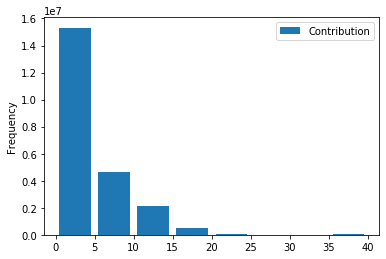

In [17]:
df_pharmacy[['Contribution']].plot(kind='hist',rwidth=0.8,bins=[0,5,10,15,20,25,30,35,40])
plt.show()